## Mid-term exam

Consider the function $f(t, y) = \sin(t^2) - y$. 

**Part (1)**

(a) Define a sympy expression for $f$.  Using Sympy's *pprint* command, display the function. 

(b) Using Sympy, compute these partial derivatives of $f$: 
$$\frac{\partial f}{\partial t}  \hskip 1cm \frac{\partial f}{\partial y}$$  Display them using Sympy's *pprint* command. 
 
 

In [11]:
## (1) a
import sympy as sp
t=sp.Symbol('t')
y=sp.Symbol('y')
f= sp.sin(t**2)-y
fty=sp.Symbol('f(t,y)')
de=sp.Eq(fty,f)
sp.pprint(de)


                 ⎛ 2⎞
f(t,y) = -y + sin⎝t ⎠


In [13]:
## (1) b
dt=sp.lambdify((t,y),f,'numpy')
dt=sp.Derivative(f,t)
dt=dt.doit()
sp.pprint(dt)
dy= sp.Derivative(f,y)
dy=dy.doit()
sp.pprint(dy)


       ⎛ 2⎞
2⋅t⋅cos⎝t ⎠
-1


**Part (2)**

Consider the **ODE**

$$\frac{dy}{dt} = f(t,y) = \sin(t^2) - y$$

 - (a) Can you solve it with Sympy's **dsolve** command?   If so, do it. What kind of solution does it give?   If not, show us how Sympy fails.  
 
 - (b) If possible, write out (as explicitly as you can) the unique solution with 
 $$y(0)=0$$


In [9]:
## (2) a
de=sp.Eq(sp.Derivative(y(t),t),f) # an expression for the ODE
sp.pprint(de)
ysol=sp.dsolve(de,y(t),ics={y(t).subs(t,0):0}) 
sp.pprint(ysol)


d                  ⎛ 2⎞
──(y(t)) = -y + sin⎝t ⎠
dt                     
                                  ⎛√2⋅t⎞       
                  3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                                  ⎝ √π ⎠       
y(t) = C₁ - t⋅y + ─────────────────────────────
                             8⋅Γ(7/4)          


In [10]:
## (2) b
# solve the ODE with y(0)=0
t=0
ysol1=sp.dsolve(de,y(t),ics={y(t).subs(t,0):0})
sp.pprint(ysol1)
#when y(0)=0 then C1=0


ValueError: y - sin(t**2) + Derivative(y(t), t) is not a differential equation in y(0)

This is the integral form of a solution.  Not terribly useful! 

The solution with $y(0)=0$ is the one with $c_1=0$, provided we take the integral as starting at $0$, i.e.

$$y(t) = e^{-t} \int_0^t e^t \sin(t^2)dt$$


**Part (3)**

Find numerical solutions to the ODE from Part 2, using

- (a) Euler's method. 

- (b) The 2nd-order Euler method. 

For parts (a) and (b) use the initial condition $y(0) = 0$. Approximate the solution on the interval $[0,20]$ using the three step sizes $\Delta t \in \{1/10, 1/100, 1/1000\}$.  

Print out your approximate value $y(20)$ for all six approximations. 

In [20]:
## 3 (a)
%pylab nbagg
def euler_approx(f,t0,y0,h,tn):
    t,y=t0,y0
    figure(1)
    ts,ys=[t],[y]
    while t<tn:
        y+=h*f(t,y)
        t+=h
        ts.append(t)
        ys.append(y)
    plot(ts,ys,label='h=%s'%h)
    return y



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: 'Equality' object is not callable

<IPython.core.display.Javascript object>


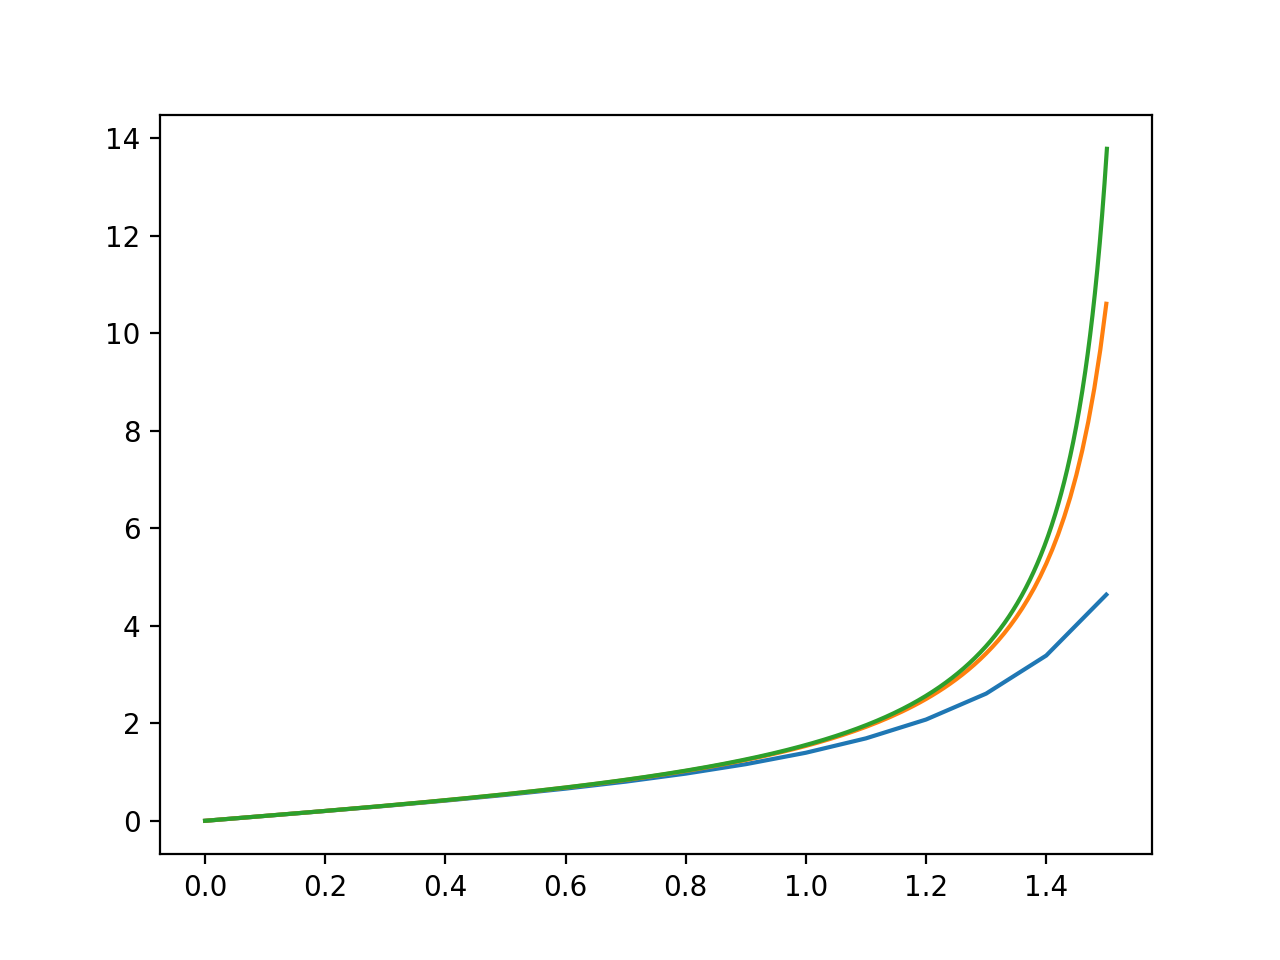

0.1 4.638812689611141
0.01 10.606172934063844
0.001 13.784918634076796


TypeError: 'Equality' object is not callable

In [21]:
## 3 (b)


def f(t,y):
    return 1+y**2

hs=[1/10,1/100,1/1000] # step sizes
close(1)
for h in hs:
    print(h,euler_approx(f,0,0,h,1.5))
ts=linspace(0,1.5,1000)
ys=ysol(ts)
plot(ts,ys,'--',label='exact solution')
legend(loc=2)
xlabel('$t$'); ylabel('$y(t)$')
title('Euler\'s method approximations to $y\'=f(t,y)$') 



(c) Plot your approximate solutions on the domain $[0,20]$. 

(d) Which method appears to be the most accurate, if you can tell? 

(e) Do any of your solutions give insights into the long-term behaviour of $y(t)$, i.e. $$\lim_{t \to \infty} y(t) ? $$
Include your results from Part (2) in this analysis. 

<IPython.core.display.Javascript object>


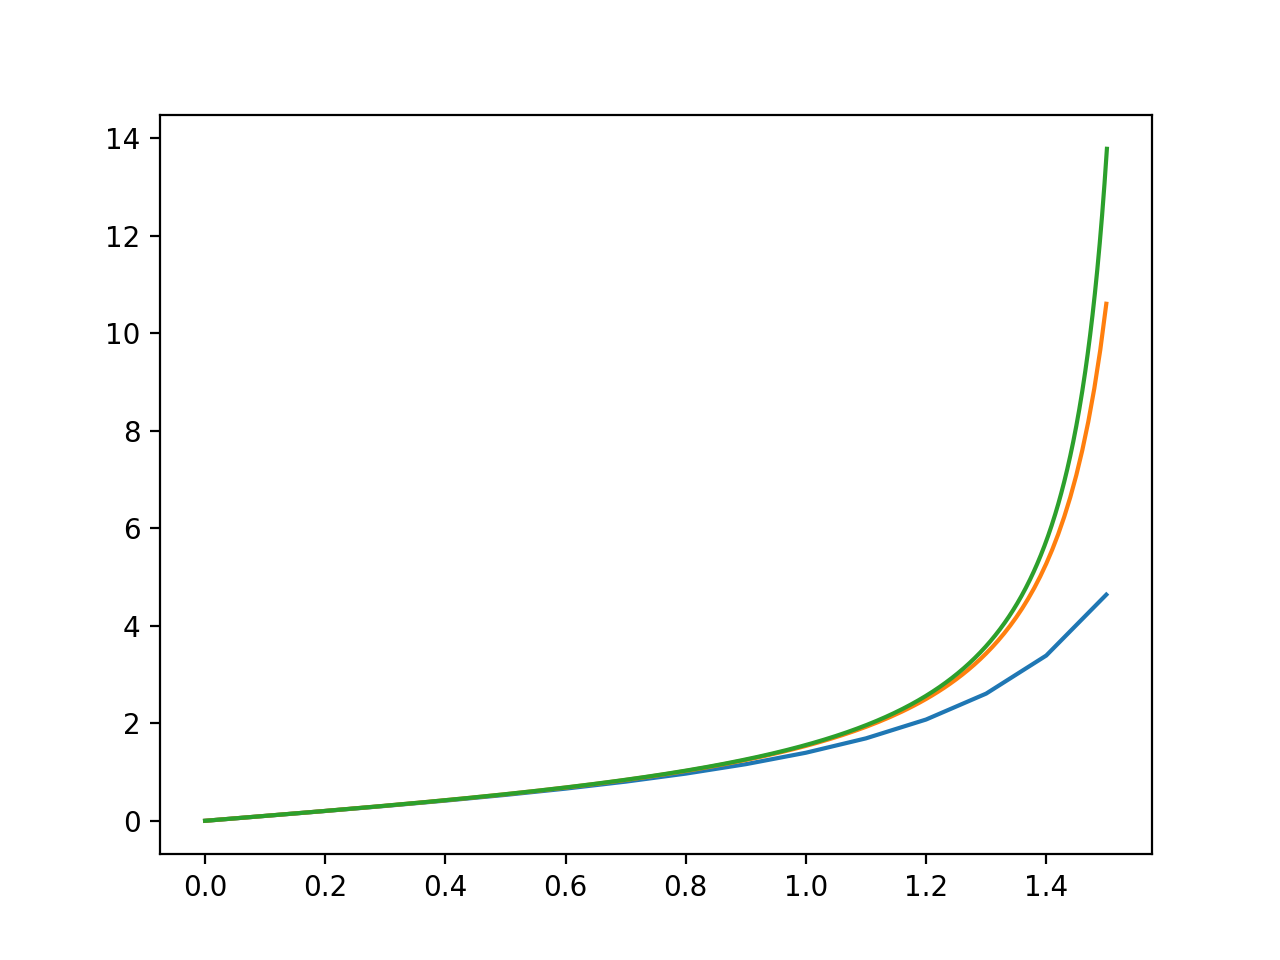

0.1 4.638812689611141
0.01 10.606172934063844
0.001 13.784918634076796


TypeError: 'Equality' object is not callable

In [22]:
## 3 (c)
def euler_approx(f,t0,y0,h,tn):
    t,y=t0,y0
    figure(2)
    ts,ys=[t],[y]
    while t<tn:
        y+=h*f(t,y)
        t+=h
        ts.append(t)
        ys.append(y)
    plot(ts,ys,label='h=%s'%h)
    return y

def f(t,y):
    return 1+y**2

hs=[1/10,1/100,1/1000] # step sizes
close(2)
for h in hs:
    print(h,euler_approx(f,0,0,h,1.5))
ts=linspace(0,1.5,1000)
ys=ysol(ts)
plot(ts,ys,'--',label='exact solution')
legend(loc=2)
xlabel('$t$'); ylabel('$y(t)$')
title('Euler\'s method approximations to $y\'=f(t,y)$') 



### Answers to  3 (d) and (e)
2- order is more accurate


## Euler approximations - Reminder

The Euler method and its variations was the subject of your second homework assignment.  The *plain* first-order Euler method was based upon the approximation

$$y(t + \Delta t) \simeq y(t) + (\Delta t)f(t,y(t))$$

where we divide the time-domain interval $[a,b]$ into $n$ equal-length sub-intervals of length $\Delta t = \frac{b-a}{n}$.  


The second-order Euler method is the approximation

$$ y(t + \Delta t) \simeq y(t) + (\Delta t)f(t, y(t)) + \frac{\Delta t^2}{2} \bigg( \frac{\partial f}{\partial t}(t,y(t)) + \frac{\partial f}{\partial y}(t,y(t)) f(t,y(t)) \bigg)$$
